In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import pandas as pd

from sklearn.model_selection import train_test_split

2023-08-27 04:31:00.449360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 04:31:00.759117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-27 04:31:00.759142: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-27 04:31:01.804076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [13]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

In [14]:
def generate_training_data():
   # xvals, yvals = 4*np.random.uniform(size=(2, 2000))
    x = np.linspace(-2.0, 2.0, 1000)
    y = np.linspace(-2.0, 2.0, 1000)
    #print(x)
    xcoord, ycoord = np.meshgrid(x,y, indexing='ij')
    print(xcoord)
    xy_vals = np.zeros(shape=(1000, 1000))
    grid_with_vals = xcoord
    print(grid_with_vals)
    for i, j in np.ndindex(4,4):
        grid_with_vals[250*i:250*(i+1), 250*j:250*(j+1)] = ((i+j)%2 ==0)
    '''for i, j in np.ndindex(1000, 1000):
        if xcoord[i,j] > 0:
            grid_with_vals[i,j,0] = xcoord[i,j]-1 > 0
        else:
            grid_with_vals[i, j,0] = xcoord[i,j]+1 > 0'''
    return grid_with_vals

In [15]:
distrib = generate_training_data()

[[-2.         -2.         -2.         ... -2.         -2.
  -2.        ]
 [-1.995996   -1.995996   -1.995996   ... -1.995996   -1.995996
  -1.995996  ]
 [-1.99199199 -1.99199199 -1.99199199 ... -1.99199199 -1.99199199
  -1.99199199]
 ...
 [ 1.99199199  1.99199199  1.99199199 ...  1.99199199  1.99199199
   1.99199199]
 [ 1.995996    1.995996    1.995996   ...  1.995996    1.995996
   1.995996  ]
 [ 2.          2.          2.         ...  2.          2.
   2.        ]]
[[-2.         -2.         -2.         ... -2.         -2.
  -2.        ]
 [-1.995996   -1.995996   -1.995996   ... -1.995996   -1.995996
  -1.995996  ]
 [-1.99199199 -1.99199199 -1.99199199 ... -1.99199199 -1.99199199
  -1.99199199]
 ...
 [ 1.99199199  1.99199199  1.99199199 ...  1.99199199  1.99199199
   1.99199199]
 [ 1.995996    1.995996    1.995996   ...  1.995996    1.995996
   1.995996  ]
 [ 2.          2.          2.         ...  2.          2.
   2.        ]]


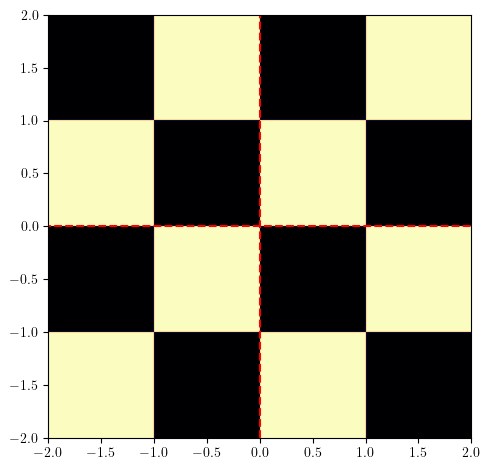

In [29]:
plt.imshow(distrib, cmap = 'magma_r', extent=(-2, 2, -2, 2))
plt.axvline(x=0, ymin=-2, ymax=2, c='r', ls='--')
plt.axhline(y=0, xmin=-2, xmax=2, c='r', ls='--')
plt.tight_layout()
plt.savefig('true_distrib.png', dpi=300)

The purpose of the above was to simply provide a "distribution" to draw from.

Pick points at random from above. There are $1000\times1000 = 10^6$ unique points in this grid.

In [17]:
sample_size = 10000

ii, jj = np.random.randint(low=0, high=1000, size=(2, sample_size))

In [18]:
draw_vals = distrib[ii, jj].round().astype(int)

In [19]:
# what are the coordinates?
xx = (ii - 500)/250
yy = (jj - 500)/250

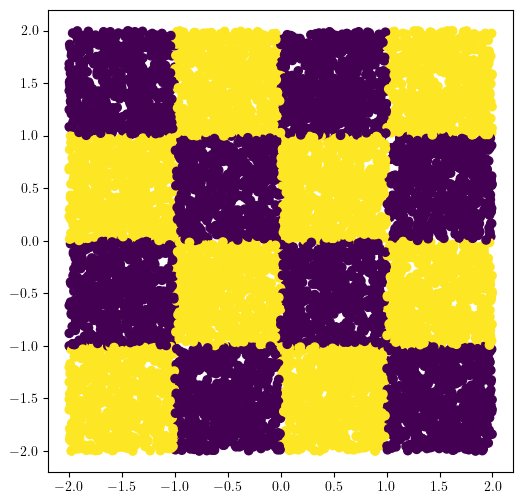

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(xx, yy, c=draw_vals)

In [21]:
df = pd.DataFrame(data={'x': xx, 'y': yy, 'category': draw_vals})

In [22]:
inner_cut = (np.abs(df['x']) <= 1.0) & (np.abs(df['y']) <= 1.0)
inner_df = df[inner_cut]

In [23]:
inner_df.shape

(2429, 3)

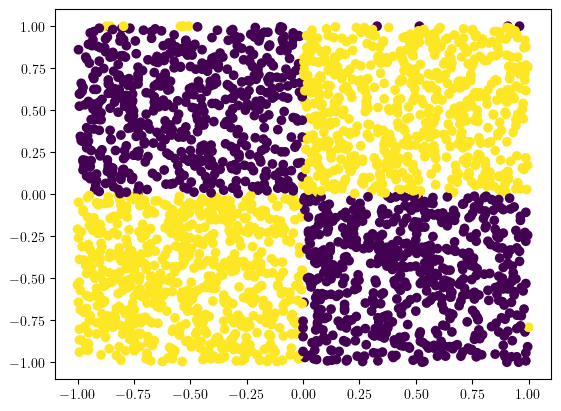

In [24]:
plt.scatter(inner_df['x'], inner_df['y'], c=inner_df['category'])

In [25]:
outer_df = df[~inner_cut]
outer_df

,x,y,category
0,-1.716,1.172,0
1,-1.588,0.772,1
3,-1.324,0.332,1
5,1.332,0.644,0
7,0.848,-1.884,1
...,...,...,...
9994,0.220,-1.656,1
9995,1.456,0.832,0
9997,1.132,1.400,1
9998,0.172,-1.596,1


In [26]:
inner_train, inner_test = train_test_split(inner_df, test_size=0.2)
# actually no, I'd like to have people learn to do this themselves

In [27]:
outer_train, outer_test = train_test_split(outer_df, test_size=0.2)

In [28]:
inner_df.to_csv('./data/category_dataset.csv', index=None)
df.to_csv('./data/extended_training.csv', index=None)
outer_test.to_csv('./data/unseen_test.csv', index=None)